In [3]:
import numpy as np
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

array([ 0, 39, 32, 56, 24, 31, 16,  8, 48, 40, 47, 23, 15,  7, 55, 57,  1,
       63, 49,  6, 41, 22,  9, 14, 25, 33, 17, 62, 30, 38,  3, 11, 59,  4,
       46, 60,  2, 12, 54, 58, 51, 52, 10, 18,  5, 50, 45, 19, 36, 37, 29,
       27, 61, 53, 28, 13, 26, 20, 21, 35, 44, 34, 43, 42])

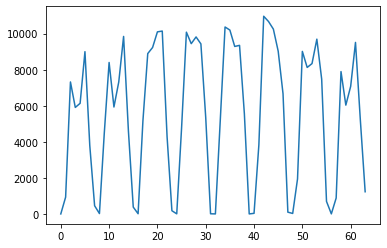

In [5]:
## Calculate which pixels change value the most

# calculate average for each pixel
average = np.average(data,axis=0)

# calculate difference of standard for each image
standard_dev = data - average
standard_dev = np.abs(standard_dev)

# sum up deviations from standard for each pixel
sum_of_deviations = np.sum(standard_dev,axis=0)

plt.plot(range(64), sum_of_deviations)

np.argsort(sum_of_deviations)

In [6]:
def optimizeFeature(x):
    return np.array([x[42], x[34]])

In [7]:
def d(x1, x2):
    x1 = optimizeFeature(x1)
    x2 = optimizeFeature(x2)
    return np.sqrt(np.sum((x1 - x2)**2))

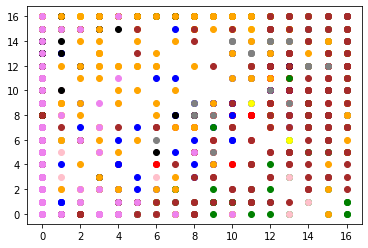

In [8]:
newData = np.array([optimizeFeature(x) for x in data])
colors = ["red", "blue", "green", "pink", "yellow", "black", "grey", "orange", "brown", "violet"]

for k in range(10):
    data_k = newData[target == k]
    plt.scatter(data_k[:,0], data_k[:,1], color=colors[k])



In [9]:
# maybe vectorize => takes about 20 seconds now
D = np.empty((data.shape[0],data.shape[0]))
for idx1, elem1 in enumerate(data):
    for idx2, elem2 in enumerate(data):
        D[idx1,idx2] = d(elem1,elem2)

In [10]:
S = np.argsort(D)

In [11]:
def p(i, m, S, target):
    label = target[i]
    S_i = S[i][:m]
    TP = np.sum(target[S_i] == label)
    FP = np.sum(target[S_i] != label)
    N_i = np.sum(target == label)
    precision = TP / (TP + FP)
    recall = TP / N_i
    return precision, recall

In [12]:
def Prec_Rec_Avg(precFunc):
    P = np.empty((data.shape[0],data.shape[0]))
    R = np.empty((data.shape[0],data.shape[0]))
    for idx1 in range(data.shape[0]):
        for idx2 in range(data.shape[0]):
            precision, recall = precFunc(idx1, idx2+1, S, target)
            P[idx1, idx2] = precision
            R[idx1, idx2] = recall

    P_avg = []
    R_avg = []
    for k in range(10):
        ktargets = np.where(target == k)
        kprecisions = P[ktargets]
        P_avg.append(np.average(kprecisions, axis=0))

        krecall= R[ktargets]
        R_avg.append(np.average(krecall, axis=0))
    
    return P_avg, R_avg

In [13]:
P_avg, R_avg = Prec_Rec_Avg(p)

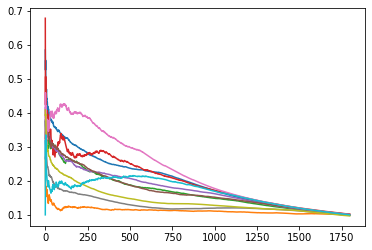

In [14]:
for k in range(10):
    plt.plot(range(1797), P_avg[k])

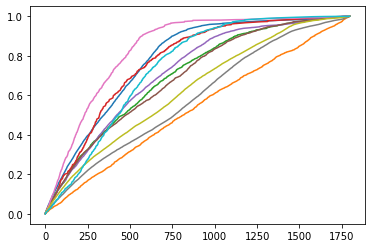

In [15]:
for k in range(10):
    plt.plot(range(1797), R_avg[k])

In [16]:
for k in range(10):
    print(np.trapz(P_avg[k], x=range(1797)))

353.87227714140147
201.04283522460616
300.50165886880967
352.34113031906475
314.19511622057473
304.10663685625286
405.9310642324234
230.94322285815022
254.3997975998185
301.50410661960905


In [17]:
for k in range(10):
    print(np.trapz(R_avg[k], x=range(1797)))

1401.7539452089386
954.0301141166524
1259.7992275527467
1386.6546776553494
1292.342266719574
1242.1486988286429
1502.3218308354444
1051.2996161168505
1132.2993295019155
1332.526018518518


In [18]:
def pg(i, m, S, target):
    label = target[i]
    prec, recall = p(i, m, S, target)
    N_i = np.sum(target == label)
    N = target.size
    precGain = max(0, ((N / N_i) - (1 / prec)) / ((N / N_i) - 1))
    precRecall = max(0, ((N / N_i) - (1 / recall) / ((N / N_i) - 1)))
    return precGain, precRecall   

In [19]:
P_avg, R_avg = Prec_Rec_Avg(pg)

<ipython-input-18-ba2d9a6ed6a0>:6: RuntimeWarning: divide by zero encountered in double_scalars
  precGain = max(0, ((N / N_i) - (1 / prec)) / ((N / N_i) - 1))
<ipython-input-18-ba2d9a6ed6a0>:7: RuntimeWarning: divide by zero encountered in double_scalars
  precRecall = max(0, ((N / N_i) - (1 / recall) / ((N / N_i) - 1)))


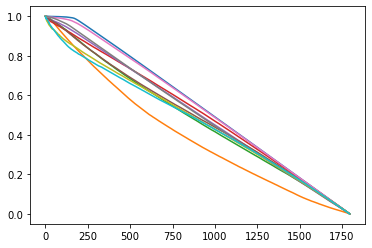

In [ ]:
for k in range(10):
    plt.plot(range(1797), P_avg[k])

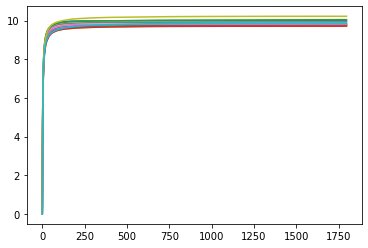

In [ ]:
for k in range(10):
    plt.plot(range(1797), R_avg[k])

In [ ]:
for k in range(10):
    print(np.trapz(P_avg[k], x=range(1797)))

982.7561460351778
716.8644254618142
864.8155029883762
923.1891154356942
912.1360895174952
883.4586078736401
973.7237782051833
913.1244272322175
856.3950662038898
846.2767370675939


In [ ]:
for k in range(10):
    print(np.trapz(R_avg[k], x=range(1797)))

17852.7186724544
17345.77471456516
17905.271017437502
17304.431307843042
17502.109801889143
17392.878891178832
17538.63879892308
17721.283355896456
18202.214700911667
17554.82207565927


# 2

In [20]:
import pandas as pd

In [24]:
rc_data = pd.read_csv("./Crowdsourcing Dataset/CrowdstormingDataJuly1st.csv", index_col="playerShort")

In [34]:
rc_data.columns

Index(['player', 'club', 'leagueCountry', 'birthday', 'height', 'weight',
       'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [47]:
# filter players with missing skin rating
skin_rating_present = ~(rc_data.rater1.isna() | rc_data.rater2.isna())
rc_data = rc_data[skin_rating_present]

In [53]:
rc_data["redCardsPerGame"] = rc_data.redCards / rc_data.games

<ipython-input-53-d05a4dba898b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc_data["redCardsPerGame"] = rc_data.redCards / rc_data.games


In [48]:
rc_data.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,124575.000000,123868.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124621.000000,124468.000000,1.244680e+05,1.244680e+05,124468.000000,1.244680e+05,124468.000000
mean,182.125330,76.368102,2.993613,1.342663,0.714968,0.935982,0.353432,0.399170,0.012061,0.012751,0.264255,0.302862,1531.111546,29.488096,0.348123,1.817187e+04,6.287461e-04,0.463797,1.884147e+04,0.002988
std,6.804843,7.188595,3.580429,1.879913,1.143873,1.422906,0.944250,0.821651,0.111052,0.113901,0.295382,0.293020,916.314559,27.963752,0.032087,1.261437e+05,4.788647e-03,0.219206,1.296022e+05,0.019719
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,178.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,183.000000,76.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1574.000000,15.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2332.000000,45.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [52]:
(rc_data.rater1 - rc_data.rater2).abs().mean()

0.05831882267033646

In [57]:
rc_data.redCardsPerGame.argmax()

141